<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>

### 1. [Data Preparation](#1)

1.1 [Importing Necessary Libraries and datasets](#1.1)

1.2 [Data Retrieving](#1.2)

1.3 [Rename Column](#1.3)

<br>

### 2. [Data Cleaning](#2)

2.1 [About This Dataset](#2.1)

2.2 [Data Types](#2.2)

2.2.1 [Format Data Features](#2.2.1)

2.2.2 [Remove Unit for Measurement](#2.2.2)

2.2.3 [Remove Prefix & Typo Check](#2.2.3)

2.3 [Translate The Content](#2.3)

2.4 [Uppercase the Content](#2.4)

2.5 [Missing Values](#2.5)

2.6 [Check data types & Make the data homogeneous](#2.6)

2.7 [Extra-whitespaces](#2.7)

2.8 [Sanity Checks](#2.8)

2.9 [Checking for Impossible values & Outliers](#2.9)

2.9.1 [Some domain knowledge](#2.9.1)

2.9.2 [Descriptive Statistics for Central Tendency](#2.9.2)

2.9.3 [Descriptive Statistics for Variability](#2.9.3)

2.9.4 [Remove Impossible Values](#2.9.4)

2.10 [Create Categorical Price](#2.10)

2.11 [Save The Intermediate Data](#2.11)

<br>

### 3. [Data Exploration (EDA)](#3)
3.1 [Frequency of each corresponiding Target variable type](#3.1)

3.2 [Determine Location (urban & suburban) influence on price](#3.2)

3.3 [Legal Document Factor](#3.3)

3.4 [The most common Wards](#3.4)

<br>

### 4. [Feature Engineering](#4)
4.1 [Drop Unrelated columns to the target](#4.1)

4.2 [Class imbalances](#4.2)

4.3 [Encoding](#4.3)

<br>

### 5. [Model Building](#5)
5.1 [Train/Test split](#5.1)

5.2 [Simple Logistic Regression as Baseline](#5.2)

5.3 [Random Forest with Pipelines](#5.3)

5.4 [Combining GridSearch + Random Forest with Pipelines](#5.4)

<br>

### 6. [Conculsions](#6)

<br>

### 7. [References](#7)

<br>

### 8. [Appendix](#8)

<hr>

<a id="1"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Data Preparation</strong></h1>

<a id="1.1"></a>
# 1.1 Importing Necessary Libraries and datasets

In [2]:
# Install a conda package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install scikit-learn
!{sys.executable} -m pip install xgboost
!{sys.executable} -m pip install statsmodels
!{sys.executable} -m pip install imbalanced-learn
!{sys.executable} -m pip install category_encoders


# work with data in tabular representation
from datetime import time
import pandas as pd
# round the data in the correlation matrix
import numpy as np
import os

# Modules for data visualization
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.rcParams['figure.figsize'] = [6, 6]

# Ensure that our plots are shown and embedded within the Jupyter notebook itself. Without this command, sometimes plots may show up in pop-up windows
%matplotlib inline

# overwrite the style of all the matplotlib graphs
sns.set()

# ignore DeprecationWarning Error Messages
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# check the version of the packages
print("Numpy version: ", np.__version__)
print("Pandas version: ",pd.__version__)
! python --version

Numpy version:  2.1.3
Pandas version:  2.3.2
Python 3.11.3


<a id="1.2"></a>
# Data Retrieving
***
In order to load data properly, the data in csv file have to be examined carefully. First of all, all the categories are seperated by the "," and strip the extra-whitespaces at the begin by setting "skipinitialspace = True".

In [8]:
%time

# set the path of the external data from the third party source - Kaggle
external_data_path = os.path.join(os.path.pardir, '', 'data','external')
VN_housing_dataset = os.path.join(external_data_path, 'VN_housing_dataset.csv')


# import test dataset
df = pd.read_csv(VN_housing_dataset, delimiter=',', skipinitialspace = True)

print("The shape of the ORGINAL data is (row, column):", str(df.shape))

# drop Unnamed, it is just a number given to identify each house
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head(3)

CPU times: total: 0 ns
Wall time: 0 ns
The shape of the ORGINAL data is (row, column): (82497, 13)


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="1.3"></a>
## Rename column
***
Since these columns are in Vietnamese so translate into English will be more straightforward in later process. We will also analyse the column meaning:
- The `Ngày` will be the date which will contain all the day, month, year value
- The `Địa chỉ` will be the address which contains the street, ward, district, city
- The `Quận` is district
- The `Huyện` is not suppose to be the ward. However, the content they have is actually the ward
- The `Loại hình nhà ở` is a type of house which depends on the location such as villa, house in the main street, house in the alley, or townhouse.
- The `Giấy tờ pháp lý` is the legal document either already have, or on waiting, or others documents.
- The `Số tầng` is the number of floor
- The `Số phòng ngủ` is the number of bedroom
- The `Diện tích` is the area unit in meter square
- The `Dài` is the length unit in meter
- The `Rộng` is the width unit in meter
- The `Giá/m2`is the price in million VND per meter square

In [9]:
df.columns = [
    'Date', 'Address', 'District',
    'Ward', 'House_type', 'Legal_documents', 
    'No_floor', 'No_bedroom', 'Area', 'Length', 'Width', 'Price']
df.head(3)

,Date,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²


<a id="2"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Data Cleaning</strong></h1>

<a id="2.1"></a>
## About This Dataset
***

Now let's go through the features and describe a little:
***
**Categorical:**
- **Nominal**
    > - **Address**: a string describe full address of the house in Hanoi 
    > - **District**: a string descaribe the district the house is located
    > - **Ward**: a string describe the ward the house is located
    > - **Housing_type**: a string describe the type of house including byroad, street house, villa, townhouse
    > - **Legal_documents**: a string describe the status of legal documents including available, on waiting, others
- **Ordinal**
    > - **No_room**: a string describe the number of bedroom in the house
    > - **No_floor**: a string describe the house's floor quantity
***
**Numeric:**
- **Continuous**
  >  - **Area**: a string describe the area of the house in meter square
  >  - **Length**: a string describe the length of the house's area in meter
  >  - **Width**: a string describe the width of the house's area in meter
  >  - **Price**: a string describe the cost in million VND of each meter square
***
**Date/time:**
- **Date**(Nominal variable): a string describe the date the house is upload on alonhadat.com.vn

<a id="2.2"></a>
## Data types
***

<a id="2.2.1"></a>
### Format date features

In [10]:
# Now let's create new features from date column

# Cast date columns to the Date data type
df['Date'] = pd.to_datetime(df['Date'])

# Show days of the week into a separated column
df['Day_Of_Week'] = df['Date'].dt.day_name()

# Cast Date columns to the string data type in order to slice data later
df['Date'] = df['Date'].astype(str)

# slice the column to get the year and month in a new column
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

# get the month and year
df['Month'] = get_months(df, 'Date')
df['Year'] = get_years(df, 'Date')

# Drop original columns
df = df.drop(['Date'], axis=1)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²",Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²",Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²,Wednesday,08,2020


### ------------> OBSERVATION
<hr>

> We will process the column 'Area', 'Length', 'Width' and 'Price' and turn it into a continuous numerical value. Firstly we will remove all the unit of each column, and then we will replace ',' to '.' for the price column because the string need to be in the correct format before convert to float value. Then we will convert those columns into numerical value.

<hr>

<a id="2.2.2"></a>
### Remove Unit for Measurement

In [11]:
# remove the unit
df['Area'] = df['Area'].replace('\sm²', '', regex=True)
df['Length'] = df['Length'].replace('\sm', '', regex=True)
df['Width'] = df['Width'].replace('\sm', '', regex=True)
df['Price'] = df['Price'].replace('\striệu/m²', '', regex=True).replace(',', '.', regex=True)

# df is the DataFrame, and column_list is a list of columns as strings
def coerce_df_columns_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors='coerce')
    return df.dtypes

# convert the value into float for all the column 'Area', 'Length', 'Width', 'Price'
coerce_df_columns_to_numeric(df, ['Area','Length', 'Width', 'Price'])

Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object

<a id="2.2.3"></a>
### Remove prefix & Typo check
We will process column 'District', 'Ward' by removing its repeative prefix. This will help us extract only the name of the district and ward.

In [12]:
# remove the prefix to only extract the district name
df['District'] = df['District'].replace('Quận\s', '', regex=True)

# print out list of District types
print(f'NUMBER OF CATEGORIES: {df.District.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.District.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['Cầu Giấy' 'Thanh Xuân' 'Hai Bà Trưng' 'Tây Hồ' 'Đống Đa' 'Hà Đông'
 'Huyện Thanh Trì' 'Hoàng Mai' 'Long Biên' 'Hoàn Kiếm' 'Nam Từ Liêm'
 'Ba Đình' 'Huyện Hoài Đức' 'Bắc Từ Liêm' 'Huyện Đan Phượng'
 'Huyện Thanh Oai' 'Huyện Sóc Sơn' 'Huyện Gia Lâm' 'Huyện Chương Mỹ'
 'Huyện Đông Anh' 'Huyện Thường Tín' 'Thị xã Sơn Tây' 'Huyện Mê Linh'
 'Huyện Thạch Thất' 'Huyện Quốc Oai' 'Huyện Phúc Thọ' 'Huyện Phú Xuyên'
 'Huyện Ba Vì' nan 'Huyện Mỹ Đức']





In [13]:
# remove the prefix to only extract the ward name
df['Ward'] = df['Ward'].replace('Phường\s', '', regex=True)
df['Ward'] = df['Ward'].replace('Xã\s', '', regex=True)

# print out list of Ward types
print(f'NUMBER OF CATEGORIES: {df.Ward.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Ward.unique()}\n\n\n')

NUMBER OF CATEGORIES: 305; 

UNIQUE NAMES OF THE CATEGORIES ['Nghĩa Đô' 'Kim Giang' 'Minh Khai' 'Thụy Khuê' 'Yên Hoà' 'Trung Liệt'
 'Đống Mác' 'Xuân La' 'Văn Quán' 'Thị trấn Văn Điển' 'Định Công' 'Bồ Đề'
 'Quang Trung' 'Thanh Lương' 'Khương Trung' 'Phúc Tân' 'Gia Thụy'
 'Khương Đình' 'Phương Canh' 'Tương Mai' 'La Khê' 'Mễ Trì' 'Khương Mai'
 'Láng Hạ' 'Quan Hoa' 'Tây Mỗ' 'Ngọc Khánh' 'Đại Mỗ' 'Tả Thanh Oai'
 'Mỹ Đình 1' 'Tam Hiệp' 'Cống Vị' 'Bách Khoa' 'Vĩnh Phúc' 'Kim Chung'
 'Đại Kim' 'Mai Động' 'Trung Tự' 'Kiến Hưng' 'Trúc Bạch' 'Cổ Nhuế 1'
 'Đức Giang' 'Mỹ Đình 2' 'Bưởi' 'Ô Chợ Dừa' 'Long Biên' 'Hoàng Văn Thụ'
 'Mai Dịch' 'Nhân Chính' 'Vạn Phúc' 'Ngọc Hà' 'Lĩnh Nam' 'Xuân Đỉnh'
 'Phú Đô' 'Liễu Giai' 'Thị trấn Phùng' 'Kim Liên' 'Phúc Diễn' 'Kim Mã'
 'Trung Phụng' 'Tân Mai' 'Cầu Diễn' 'Ngã Tư Sở' 'Trung Văn' 'Thượng Đình'
 'Hoàng Liệt' 'Thịnh Liệt' 'Quốc Tử Giám' 'Khâm Thiên' 'Trương Định'
 'Phú Diễn' 'Thạch Bàn' 'Ngọc Thụy' 'Cầu Dền' 'Phú Lương' 'Bạch Đằng'
 'Phú La' 'Hà Cầu' 'Láng T

### ------------> OBSERVATION

> After cleaning the address, we will look at the remaining categories column. We will look at their unique value, and replace Vietnamese by English term for further process. We also remove prefix in column 'No_floor' and 'No_room'.

In [14]:
# print out list of House_type types
print(f'NUMBER OF CATEGORIES: {df.House_type.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.House_type.unique()}\n\n\n')

NUMBER OF CATEGORIES: 4; 

UNIQUE NAMES OF THE CATEGORIES ['Nhà ngõ, hẻm' 'Nhà mặt phố, mặt tiền' 'Nhà biệt thự' 'Nhà phố liền kề'
 nan]





In [15]:
# print out list of Legal_documents types
print(f'NUMBER OF CATEGORIES: {df.Legal_documents.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Legal_documents.unique()}\n\n\n')

NUMBER OF CATEGORIES: 3; 

UNIQUE NAMES OF THE CATEGORIES ['Đã có sổ' nan 'Đang chờ sổ' 'Giấy tờ khác']





In [16]:
# print out list of No_floor types
print(f'NUMBER OF CATEGORIES: {df.No_floor.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_floor.unique()}\n\n\n')

NUMBER OF CATEGORIES: 29; 

UNIQUE NAMES OF THE CATEGORIES ['4' nan '6' '5' '7' '2' '3' '8' '1' '9' '50' '38' '35' '10'
 'Nhiều hơn 10' '45' '33' '42' '25' '73' '12' '65' '55' '30' '14' '40'
 '52' '54' '32' '29']





As you can see, we need to remove the suffix in the column No_bedroom

In [17]:
df['No_bedroom'] = df['No_bedroom'].replace('\sphòng', '', regex=True)

# print out list of No_bedroom types
print(f'NUMBER OF CATEGORIES: {df.No_bedroom.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.No_bedroom.unique()}\n\n\n')

NUMBER OF CATEGORIES: 11; 

UNIQUE NAMES OF THE CATEGORIES ['5' '3' '4' '6' 'nhiều hơn 10' '8' '2' '7' '9' '1' '10' nan]





<a id="2.3"></a>
### Translate the content
We will now translate the content of these 4 columns. As you can see the house type will have 4 values including byroad, street house, villa, and townhouse. These are the finnest word that we can find to clearly represent the meaning in Vietnamese. Similarly for the column legal documents where it will has 3 values including available, waiting, and others. For the No_floor and No_bedroom, we translate the phrase "greater than 10" value.

In [18]:
# Translate the content from Vietnamese into English

df['House_type'].replace('Nhà ngõ, hẻm', 'byroad', inplace=True)
df['House_type'].replace('Nhà mặt phố, mặt tiền', 'street_house', inplace=True)
df['House_type'].replace('Nhà biệt thự', 'villa', inplace=True)
df['House_type'].replace('Nhà phố liền kề', 'townhouse', inplace=True)

df['Legal_documents'].replace('Đã có sổ', 'available', inplace=True)
df['Legal_documents'].replace('Đang chờ sổ', 'waiting', inplace=True)
df['Legal_documents'].replace('Giấy tờ khác', 'others', inplace=True)

df['No_floor'].replace('Nhiều hơn 10', 'greater_than_10', inplace=True)

df['No_bedroom'].replace('nhiều hơn 10', 'greater_than_10', inplace=True)

df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Nghĩa Đô,byroad,available,4,5,46.0,NaN,NaN,86.96,Wednesday,08,2020
1,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Kim Giang,street_house,NaN,NaN,3,37.0,NaN,NaN,116.22,Wednesday,08,2020
2,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Minh Khai,byroad,available,4,4,40.0,10.0,4.0,65.00,Wednesday,08,2020


<a id="2.4"></a>
### Upper Case the content
In this section we will convert all the string value in the column to uppercase for further processing and keep all the string uniformly format. This will improve the analysis of the data, and also easier to perform any function related to the string. 

In [19]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
df = df.applymap(lambda s: s.upper() if type(s) == str else s)
df.head(3)

,Address,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Year
0,"ĐƯỜNG HOÀNG QUỐC VIỆT, PHƯỜNG NGHĨA ĐÔ, QUẬN C...",CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,NaN,NaN,86.96,WEDNESDAY,08,2020
1,"ĐƯỜNG KIM GIANG, PHƯỜNG KIM GIANG, QUẬN THANH ...",THANH XUÂN,KIM GIANG,STREET_HOUSE,NaN,NaN,3,37.0,NaN,NaN,116.22,WEDNESDAY,08,2020
2,"PHỐ MINH KHAI, PHƯỜNG MINH KHAI, QUẬN HAI BÀ T...",HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,40.0,10.0,4.0,65.00,WEDNESDAY,08,2020


<a id="2.5"></a>
## Missing values
Missing values can cause a lot of unexpected problems such as not reducing the power of a model, but also negatively affect the performance of the studies and analysis of that data. Hence, it is important to deal with missing data. First step is to check the number of missing values of each column and fill in with the appropriate values. 

Missing values in the dataframe in descending: 
                  Total  Percent
Length           62670    75.97
Width            47052    57.03
No_floor         46098    55.88
Legal_documents  28887    35.02
Price              871     1.06
Ward                48     0.06
Address             48     0.06
No_bedroom          39     0.05
House_type          32     0.04
District             2      NaN
Area                 2      NaN
Day_Of_Week          1      NaN


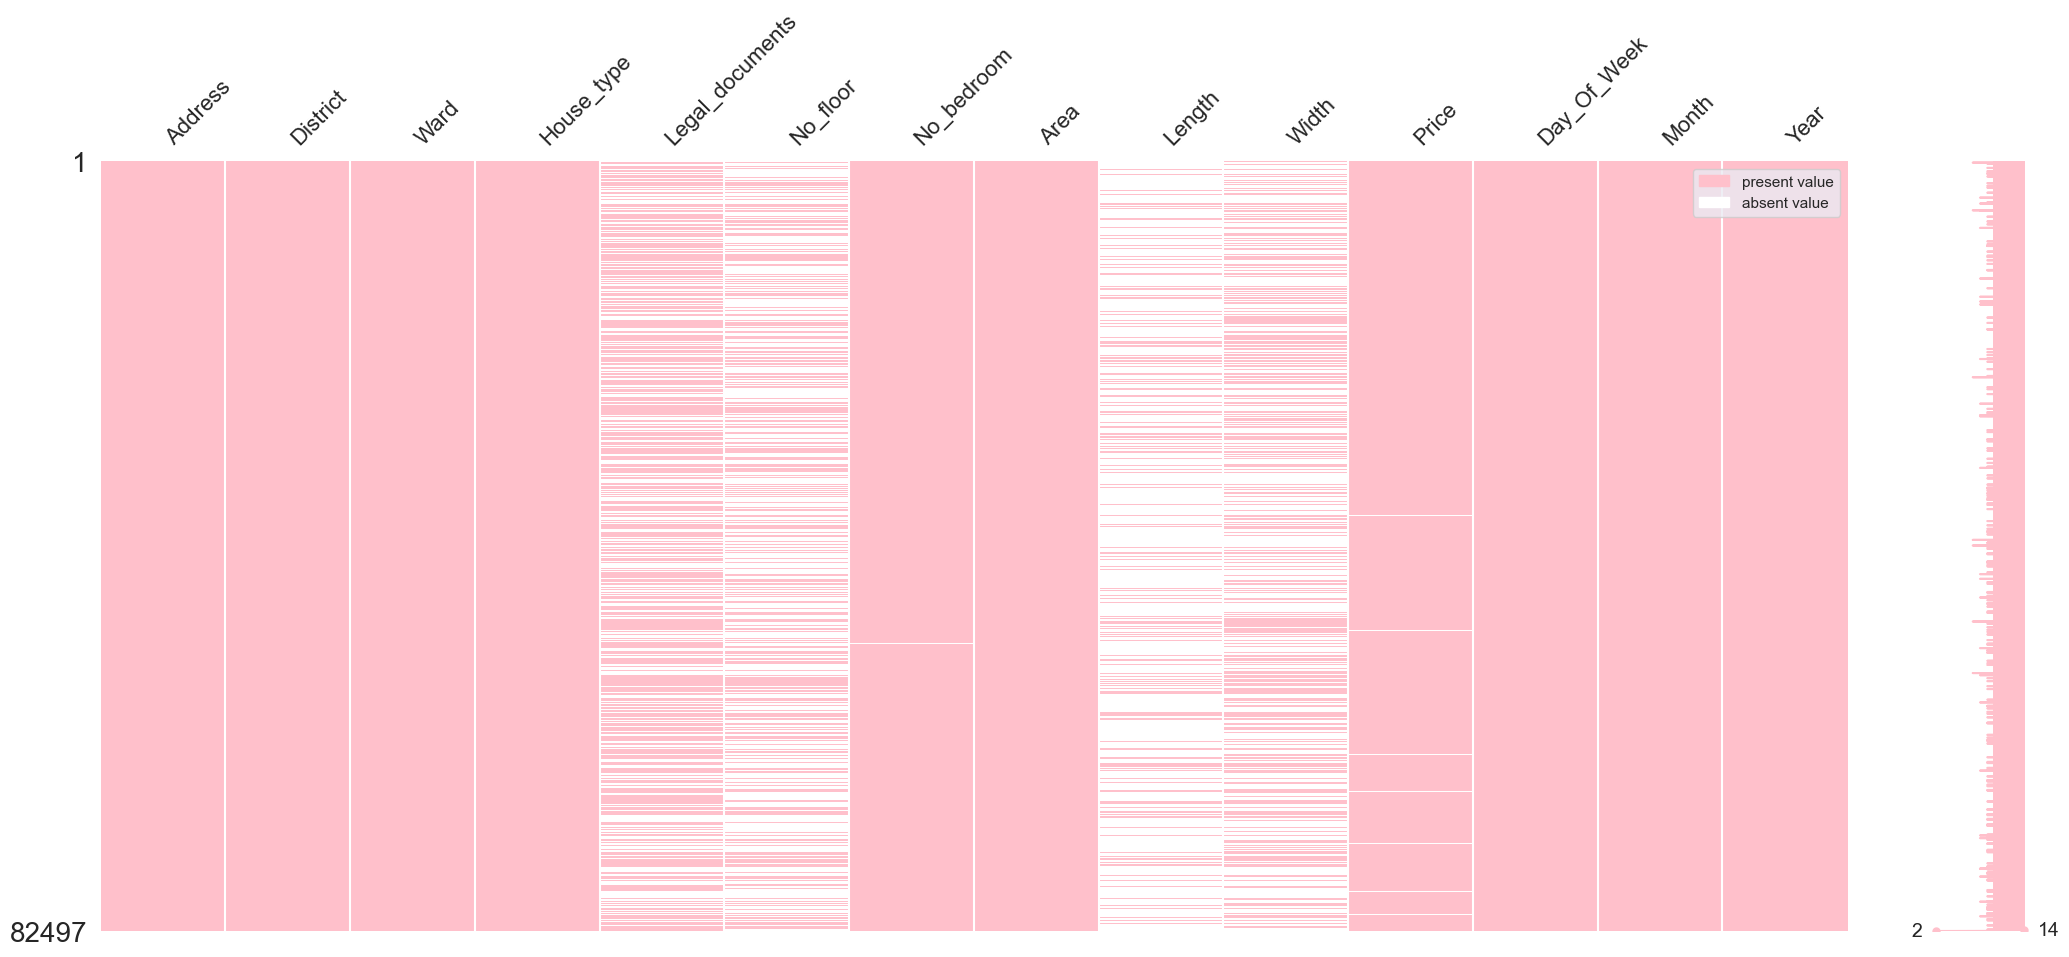

In [20]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2)[
        round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# display missing values in descending
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

# visualize where the missing values are located
msno.matrix(df, color=(255 / 255, 192 / 255, 203 / 255))
pink_patch = mpatches.Patch(color='pink', label='present value')
white_patch = mpatches.Patch(color='white', label='absent value')
plt.legend(handles=[pink_patch, white_patch])
plt.show()

### ------> OBSERVATION

<hr>

+ Only a few missing values of the dataframes suggests that it MIGHT be missing completely at random due to a small number of missing values.

District             2      NaN
Area                 2      NaN
Date                 1      NaN
day_of_week          1      NaN


> I'm going to delete any missing column that IS COMPLETELY AT RANDOM (MCAR) AND has small number of missing values.
> From the graph, I can see a strong correlation the strong correlation between `Legal_documents`, `No_floor`, `Length` and `Width`.


<hr>

In [22]:
# Pairwise delete the rows
df.dropna(subset=['District', 'Area', 'Day_Of_Week', 'Month', 'Year'], how='any', inplace=True)

<br><br>
<a id="2.6"></a>
## Check data types & Make the data homogeneous
The dtypes that pandas uses are: `float`, `int`, `bool`, `datetime`, `timedelta`, `category` and `object`. I modify data types in my DataFrames to help me transform them into more meaningful metrics

+ Cast pandas objects to a specified dtype (string)¶
+ Numeric data should have for example the same number of digits after the point.

In [23]:
print("The shape of the data BEFORE CONVERT is (row, column):", str(df.shape))
print("The data types BEFORE CONVERT are:", df.dtypes, "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df[['Month', 'Year']] = df[['Month', 'Year']].astype('int32', errors='ignore')


print("The shape of the data AFTER CONVERT is (row, column):", str(df.shape))
print("The data types AFTER CONVERT are:", df.dtypes, "\n\n")

The shape of the data BEFORE CONVERT is (row, column): (82494, 14)
The data types BEFORE CONVERT are: Address             object
District            object
Ward                object
House_type          object
Legal_documents     object
No_floor            object
No_bedroom          object
Area               float64
Length             float64
Width              float64
Price              float64
Day_Of_Week         object
Month               object
Year                object
dtype: object 


The shape of the data AFTER CONVERT is (row, column): (82494, 14)
The data types AFTER CONVERT are: Address            string[python]
District           string[python]
Ward               string[python]
House_type         string[python]
Legal_documents    string[python]
No_floor           string[python]
No_bedroom         string[python]
Area                      Float64
Length                    Float64
Width                     Float64
Price                     Float64
Day_Of_Week        string[pyt

In [24]:
print("The dataframe BEFORE dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))

# If all values are NA, drop that row or column.
df.dropna(how='all', inplace=True)

# display missing values in descending
print("The dataframe AFTER dropped has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("Missing values in the dataframe in descending: \n", missing_percentage(df).sort_values(by='Total', ascending=False))

The dataframe BEFORE dropped has 82494 rows and 14 columns
The dataframe AFTER dropped has 82494 rows and 14 columns
Missing values in the dataframe in descending: 
                  Total  Percent
Length           62668    75.97
Width            47051    57.04
No_floor         46096    55.88
Legal_documents  28886    35.02
Price              869     1.05
Address             47     0.06
Ward                46     0.06
No_bedroom          38     0.05
House_type          31     0.04


In [25]:
# extract the value date to get the day of week
df['Day_Of_Week'].value_counts(dropna=False)

Day_Of_Week
TUESDAY      14310
MONDAY       13888
WEDNESDAY    12459
THURSDAY     12425
FRIDAY       12170
SATURDAY     10669
SUNDAY        6573
Name: count, dtype: Int64

In [26]:
# check the unique value of the month
df['Month'].value_counts(dropna=False)

Month
7     44807
6     29791
8      7542
5       196
4        59
3        51
2        36
10        6
12        3
11        2
9         1
Name: count, dtype: int64

In [27]:
# check the unique value of the year
df['Year'].value_counts(dropna=False)

Year
2020    82476
2019       18
Name: count, dtype: int64

In [28]:
# check the unique value of legal_documents to to see if the value is completely translated
df['Legal_documents'].value_counts(dropna=False)

Legal_documents
AVAILABLE    52912
<NA>         28886
WAITING        356
OTHERS         340
Name: count, dtype: Int64

### ---------------> OBSERVATION:

> As you can see, the Legal_documents contains a great amount of missing value. Instead of filling the missing value with mode which is AVAILABLE, it will be better to fill it with OTHERS. It is safe to assume if a house's legal documents is not listed, we can said that the house is OTHERS which is not AVAILABLE OR WAITING.

In [29]:
# fill the missing value for Legal_documents by 'OTHERS'
df['Legal_documents'].fillna("OTHERS", inplace=True)

In [30]:
# check the unique value of the House_type
df['House_type'].value_counts(dropna=False)

House_type
BYROAD          62535
STREET_HOUSE    17095
TOWNHOUSE        1881
VILLA             952
<NA>               31
Name: count, dtype: Int64

### -------> OBSERVATION:
> As you can see, the missing value is too small. Hence, we will fill it with the mode

In [31]:
# fill the missing value with mode
mode = df['House_type'].mode()[0]
df['House_type'].fillna(mode, inplace=True)

In [32]:
# check if there is any missing value in ward
df[['Address', 'Ward', 'District']][df['Ward'].isna()]

,Address,Ward,District
174,<NA>,<NA>,NAM TỪ LIÊM
324,"ĐƯỜNG AN DƯƠNG VƯƠNG, QUẬN TÂY HỒ, HÀ NỘI",<NA>,TÂY HỒ
741,"CẦU KHÊ TANG, QUẬN HÀ ĐÔNG, HÀ NỘI",<NA>,HÀ ĐÔNG
4558,<NA>,<NA>,HUYỆN HOÀI ĐỨC
5282,<NA>,<NA>,LONG BIÊN
5295,<NA>,<NA>,LONG BIÊN
7169,<NA>,<NA>,HUYỆN THANH TRÌ
8584,<NA>,<NA>,THANH XUÂN
12595,<NA>,<NA>,HÀ ĐÔNG
14548,<NA>,<NA>,HÀ ĐÔNG


### ------> OBSERVATION

<hr>

> When appraising a property, specific factors like location are only crucial if that factor is significant enough (NOT too many categories). As you can see, the address point to many location fields like city, ward, and street. Hence, there is no particular ward because a street can have multiple wards. Thus, we should only fill the missing value with None. This will conclude that there is a small percentage of housing without a specific location. Thus, the price of these houses will strongly influence the district compared to the street and the ward location. Additionally, these data will not be as crucial as a house with a specific address because an abstract house or not detailed house might not be realistic for the model to learn.

<hr>

In [33]:
# fill the missing value with None for Ward and Address column
df['Ward'].fillna("None", inplace=True)
df['Address'].fillna("None", inplace=True)

# check the unique value of the No_floor
df['No_floor'].value_counts(dropna=False)

No_floor
<NA>               46096
5                  15769
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
10                    36
45                     8
GREATER_THAN_10        7
35                     6
50                     2
38                     2
12                     2
33                     1
42                     1
25                     1
73                     1
65                     1
55                     1
30                     1
14                     1
40                     1
52                     1
54                     1
32                     1
29                     1
Name: count, dtype: Int64

### --------> OBSEVRATION:

> As you can see the missing of `No_floor` value is large. However, we can do an assumption that we can fill it with the mode because there is no better option like fill with mean or median. This is explainable because most of the house in Vietnam are having around 5 floors which is shown in the above result. Hence, we can assume the remaining missing value will also have around 5 floors.

In [34]:
# fill the missing value with mode
mode = df['No_floor'].mode()[0]
df['No_floor'].fillna(mode, inplace=True)

In [35]:
# define a function to feed into the lambda
def No_floor_count(value):
    if value == '1' or value == '2' or value == '3' \
            or value == '4' or value == '5' or value == '6' \
            or value == '7' or value == '8' or value == '9' or value == '10':
        return value
    else:
        return 'GREATER_THAN_10'

# make any floor greater than 10 to be in category 'GREATER_THAN_10'
df['No_floor'] = df['No_floor'].map(lambda n: No_floor_count(n))
# check if the above operation is success or not
df['No_floor'].value_counts(dropna=False)

No_floor
5                  61865
4                  12278
3                   3619
6                   2119
2                   1028
1                    636
7                    597
8                    188
9                     88
GREATER_THAN_10       40
10                    36
Name: count, dtype: int64

In [36]:
# check the No_bedroom
df['No_bedroom'].value_counts(dropna=False)

No_bedroom
4                  29069
3                  27162
5                   7924
2                   7330
6                   6461
1                   1388
8                    938
GREATER_THAN_10      869
7                    678
10                   354
9                    283
<NA>                  38
Name: count, dtype: Int64

### --------> OBSEVRATION:

> Since the missing value is small and neglectable. Hence, we will fill the missing value with mode. This is explainable because of the house in Vietnam is having 4 bedrooms which is shown in the above result. Hence, we can assume that the remaining missing value will also have around 4 bedrooms.

In [40]:
# fill the missing value with mode
mode = df['No_bedroom'].mode()[0]
df['No_bedroom'].fillna(mode, inplace=True)

In [42]:
# fill missing Area using median per District
df['Area'] = df.groupby('District')['Area'].transform(lambda x: x.fillna(x.median()))

# fill missing Price using median per District
df['Price'] = df.groupby('District')['Price'].transform(lambda x: x.fillna(x.median()))

# fill missing Length using median per Area
df['Length'] = df.groupby('Area')['Length'].transform(lambda x: x.fillna(x.median()))
df['Length'].fillna(df['Length'].mean(), inplace=True)

# fill missing Width using median per Area
df['Width'] = df.groupby('Area')['Width'].transform(lambda x: x.fillna(x.median()))
df['Width'].fillna(df['Width'].mean(), inplace=True)


### Let's first identify features with single or unique value in Adress field like `HÀ NỘI`, `PHƯỜNG`, `HUYỆN`, and `QUẬN` 
since they will be less significant so we can drop them.

In [43]:
# we will clean the address and only get the street number and street section, the remaining is already present in the ward, and district column
# we also assume these house are all in Hanoi

# get the remaing of the string (street number and street name) and put into new column call street
df['Street'] = df['Address'].str.replace('(, QUẬN|, PHƯỜNG|, HUYỆN|, HÀ NỘI).*', '', regex=True)
# remove all the prefix in the street
df['Street'] = df['Street'].str.replace('ĐƯỜNG\s', '', regex=True)
# remove all the prefix in the street
df['Street'] = df['Street'].str.replace('PHỐ\s', '', regex=True)

# print out list of Street types
print(f'NUMBER OF CATEGORIES: {df.Street.nunique()}; \n\nUNIQUE NAMES OF THE CATEGORIES {df.Street.unique()}\n\n\n')

NUMBER OF CATEGORIES: 7378; 

UNIQUE NAMES OF THE CATEGORIES <StringArray>
[                           'HOÀNG QUỐC VIỆT',
                                  'KIM GIANG',
                                  'MINH KHAI',
                                   'VÕNG THỊ',
                                    'YÊN HÒA',
                                    'TÂY SƠN',
                                     'LÒ ĐÚC',
                                    'XUÂN LA',
                                       '19/5',
                'TỰU LIỆT, THỊ TRẤN VĂN ĐIỂN',
 ...
                              '02, XUÂN ĐỈNH',
                             '42, HOÀNG NGÂN',
                            'TỔ 23, HOA BẰNG',
 'SỐ 9 NGÕ 211/229, KHƯƠNG TRUNG, THANH XUÂN',
                        '25, 25 VŨ NGỌC PHAN',
                  '101B-C4, NGÕ 231, TÂN MAI',
                  'KHU B ĐẠI HỌC MỎ ĐỊA CHẤT',
                      'LÊ TRỌNG TẤN HOÀI ĐỨC',
                       'LẠC LONG QUÂN TÂY HỒ',
         'SỐ 7 ĐẠI LỘ THĂNG

In [45]:
# since the column street, ward, and district already present the column address we delete the column address
df.drop('Address', axis=1, inplace=True)


In [46]:
# see the unique value of column year
df['Year'].value_counts()

Year
2020    82476
2019       18
Name: count, dtype: int64

### ------> OBSERVATION

<hr>

> As you can see, the data for 2019 is only 18 rows. Thus, to narrow down our problem, we will only use the database from 2020 to analyse and predict the house price base. Additionally, we know that all the data is collect in 2020. Thus, we will also drop the column `Year`.

<hr>

In [47]:
# drop all the row with value of 2019
df.drop(df.loc[df['Year']==2019].index, inplace=True)
# check if the above operation is successful or not
df['Year'].value_counts()

Year
2020    82476
Name: count, dtype: int64

In [49]:
# drop the column year because it is not meaningful anymore
df.drop('Year', axis=1, inplace=True)
# check the missing value
df.isna().sum()

District           0
Ward               0
House_type         0
Legal_documents    0
No_floor           0
No_bedroom         0
Area               0
Length             0
Width              0
Price              0
Day_Of_Week        0
Month              0
Street             0
dtype: int64

<a id="2.7"></a>
## Extra-whitespaces
We remove all the whitespace from the right and the left side of the string value

In [50]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(df)

<br><br>
<a id="2.8"></a>
## Sanity checks
Design and run a small test-suite, consisting of a series of sanity checks to test for the presence of **impossible values** and **outliers** for each attribute.
### Check duplication
+ Use the pandas function `.drop_duplicates()` to remove copied rows from a DataFrame

In [51]:
# print all the info
print("Number of rows before drop of duplicates  in df:", len(df.index))
print("Number of duplicated records in df: ", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in df:", len(df.index), "\n\n")

# convert columns to the best possible dtypes, object->string
df = df.convert_dtypes()
df.info()

Number of rows before drop of duplicates  in df: 82476
Number of duplicated records in df:  1361
Number of rows after drop of duplicates in df: 81115 


<class 'pandas.core.frame.DataFrame'>
Index: 81115 entries, 0 to 82477
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   District         81115 non-null  string 
 1   Ward             81115 non-null  string 
 2   House_type       81115 non-null  string 
 3   Legal_documents  81115 non-null  string 
 4   No_floor         81115 non-null  string 
 5   No_bedroom       81115 non-null  string 
 6   Area             81115 non-null  Float64
 7   Length           81115 non-null  Float64
 8   Width            81115 non-null  Float64
 9   Price            81115 non-null  Float64
 10  Day_Of_Week      81115 non-null  string 
 11  Month            81115 non-null  Int32  
 12  Street           81115 non-null  string 
dtypes: Float64(4), Int32(1), string(8)
memory usage:

<a id="2.9"></a>
<h1 style="color:#ffc0cb;font-size:40px;font-family:Georgia;text-align:center;"><strong>2. Checking for impossiple values & Outliers</strong></h1>

<a id="2.9.1"></a>

<a id="2.9.2"></a>
# Descriptive statistics for Central Tendency

In [52]:
# see the static of all numerical column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,81115.0,51.54465,474.656056,1.0,34.0,40.0,50.0,111411.0
Length,81115.0,29.949469,3198.381909,1.0,9.0,10.0,12.0,900000.0
Width,81115.0,18.905477,2050.216069,1.0,4.0,4.0,4.3,423432.0
Price,81115.0,102.455002,63.26347,1.0,73.33,90.0,110.29,998.0
Month,81115.0,6.72036,0.640843,2.0,6.0,7.0,7.0,8.0


<Axes: >

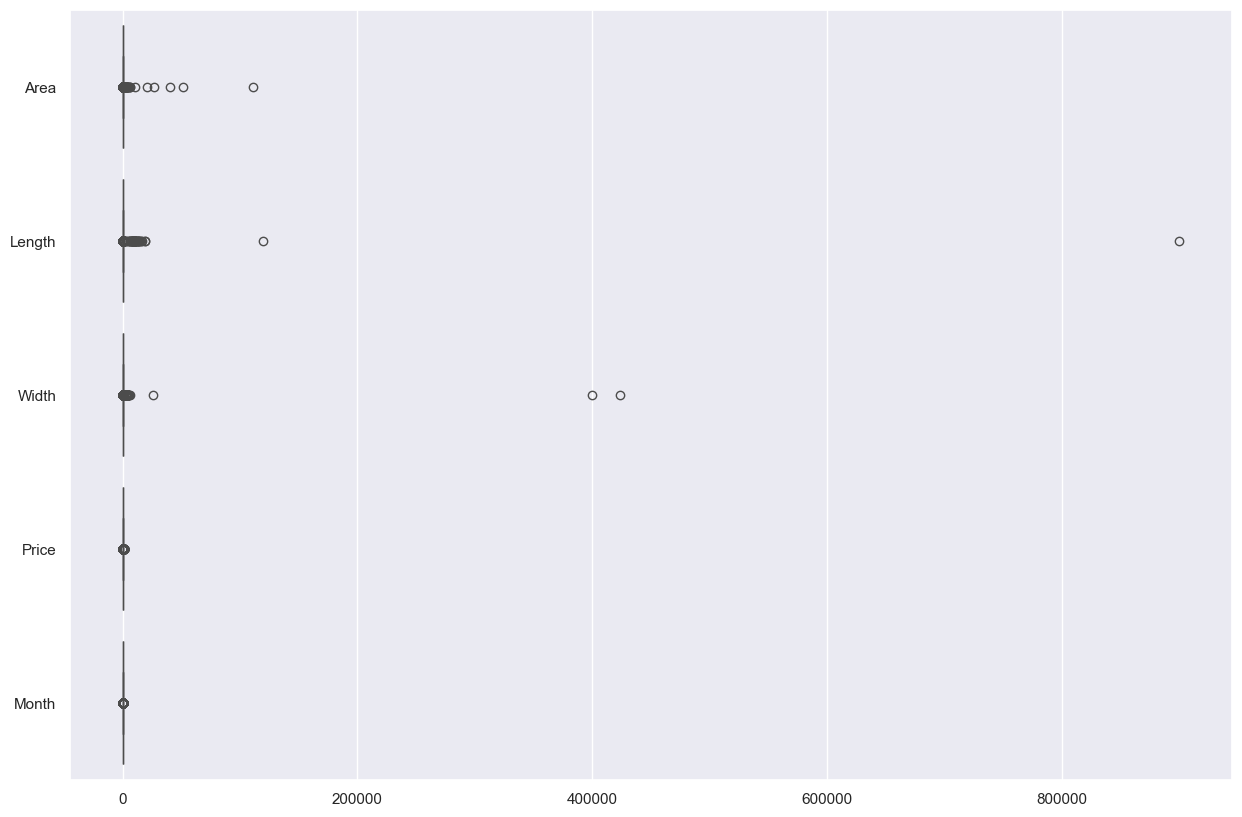

In [53]:
# plot the boxplot to see the outlier of each numerical column
plt.figure(figsize= (15,10))
sns.boxplot(data=df,orient="h")

### ---------> OBSERVATION
> For all numerical columns, I see some extreme outlier values in `Area`, `Length`, and `Width`. Let's investigate them further to see if they are real outliers or not using statistical techniques.

# Outlier detection using boxplot

<Axes: >

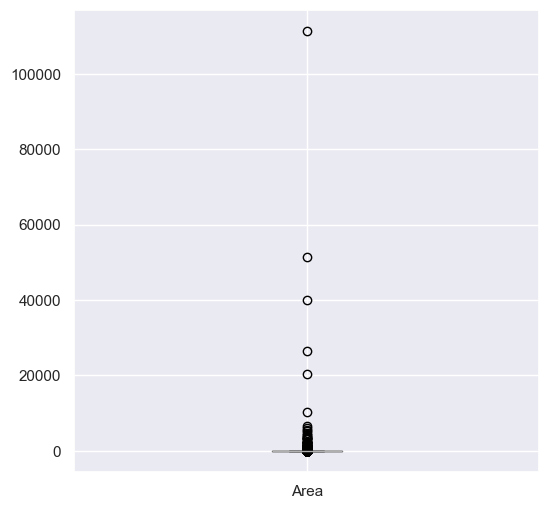

In [54]:
# plot the boxplot to see the outlier
df.boxplot('Area')

### ---------> OBSERVATION
> Base on this we can remove all the outlier that is greater than 20000 meter square. This is because those value is rare (about 5 data points). Thus, it would not affect our visualization and also it will not affect the model training process. We will replace the value with mean because we do not want the graph to be too much skew.

In [55]:
# replace all the value greater than 20000 with the mean of the column
df.loc[df['Area'] > 20000, 'Area'] = df['Area'].mean()

<Axes: >

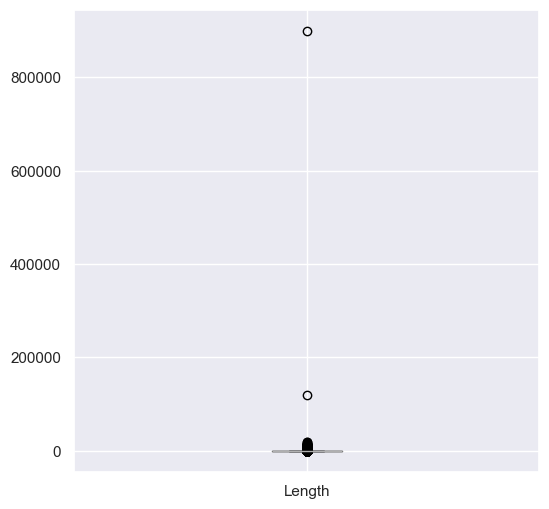

In [56]:
# plot the boxplot to see the outlier
df.boxplot('Length')

### ---------> OBSERVATION
> We will further remove all the outlier that is greater than 20000 meter. This is because the value is rare. Thus, it would not affect our visualization and also it will not affect the model trainning process. We will replace the value with mean because we do not want the graph to be too much skew.

In [57]:
# replace all the value greater than 20000 with the mean of the column
df.loc[df['Length'] > 20000, 'Length'] = df['Length'].mean()

<Axes: >

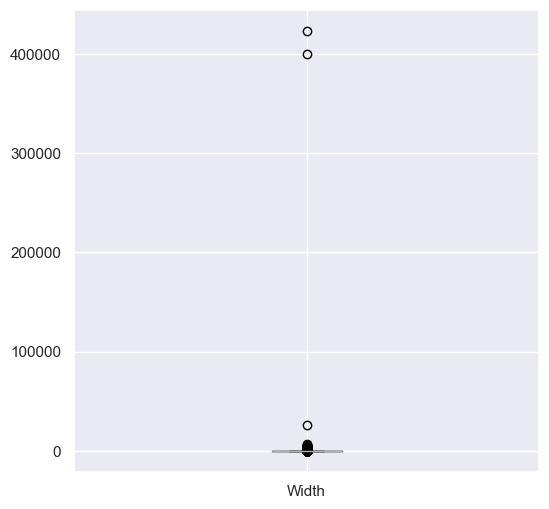

In [58]:
# plot the boxplot to see the outlier
df.boxplot('Width')

### ---------> OBSERVATION
> Similarly to the area, we will remove all the outlier that is greater than 100000 meter because there is still a great gap between two distintive outlier. This is because the value is rare. Thus, it would not affect our visualization and also it will not affect the model trainning process. We will replace the value with mean because we do not want the graph to be too much skew.

In [59]:
# replace all the value greater than 100000 with the mean of the column
df.loc[df['Width'] > 100000, 'Width'] = df['Width'].mean()

<Axes: >

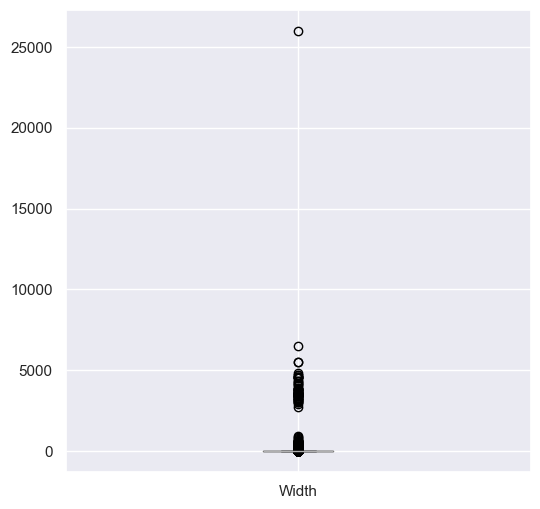

In [60]:
# plot the boxplot to see the outlier
df.boxplot('Width')

### ---------> OBSERVATION
> Similarly to the area, we will remove all the outlier that is greater than 10000 meter because there is still a great gap between two distintive outlier. This is because the value is rare. Thus, it would not affect our visualization and also it will not affect the model trainning process. We will replace the value with mean because we do not want the graph to be too much skew.

In [61]:
# replace all the value greater than 10000 with the mean of the column
df.loc[df['Width'] > 10000, 'Width'] = df['Width'].mean()

### Interquartile Range

In [62]:
# calculate the q1 and q3 and then the iqr
q1_Price = df['Price'].quantile(.25)
q3_Price = df['Price'].quantile(.75)
iqr_Price = q3_Price - q1_Price

print("q1_Price:", q1_Price, "\n")
print("q3_Price:", q3_Price, "\n")
print("iqr_Price:", iqr_Price)

q1_Price: 73.33 

q3_Price: 110.29 

iqr_Price: 36.96000000000001


<a id="2.9.3"></a>
# Descriptive statistics for Variability

In [63]:
# look at the price mean
Price_mean = df['Price'].mean()
print("Price_mean:", Price_mean)
# look at the price median
Price_median = df['Price'].median()
print("Price_median:", Price_median)
# look at the price mode
Price_mode = df['Price'].mode().values[0]
print("Price_mode:", Price_mode)

Price_mean: 102.45500197250817
Price_median: 90.0
Price_mode: 100.0


(0.0, 550.0)

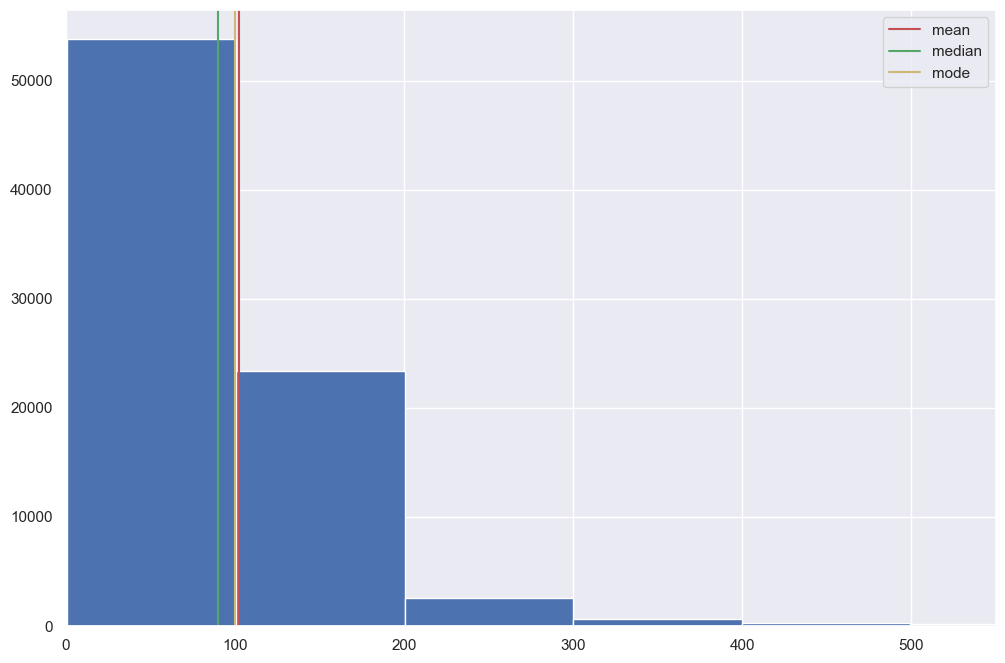

In [64]:
# plot the histogram with mean, median, and mode included
plt.figure(figsize=(12, 8))

df['Price'].hist()

plt.axvline(Price_mean, color='r', label='mean')
plt.axvline(Price_median, color='g', label='median')
plt.axvline(Price_mode, color='y', label='mode')

plt.legend()

# plt.ylim(0,50000)
plt.xlim(0,550)

### ---------> OBSERVATION
> The mean larger than the median indicates that the data is skewed to the right.

<a id="2.9.4"></a>
# Remove Impossible Values

### Area cannot be larger than Length * Width


The existing Area column might indicates the area of the whole land not the house's occupation. Therefore, the `Length * Width` is the max area that a property can get, so the values in `Area` column cannot exceed it.

In [65]:
def checkArea(df):
    #in case area is smaller or equal to the length * width -> it is correct -> return True otherwise -> return false
    if df['Length'] * df['Width'] >= df['Area']:
        return True
    return False

df['correctArea'] = df.apply(lambda r: checkArea(r), axis=1) # axis = 1 is for columns

In [66]:
#Determining the number of impossible values for Area
rslt_df = df[(df['correctArea'] == False)]
rslt_df

,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Area,Length,Width,Price,Day_Of_Week,Month,Street,correctArea
0,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,46.0,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT,False
5,CẦU GIẤY,YÊN HOÀ,BYROAD,AVAILABLE,5,GREATER_THAN_10,46.0,12.1,3.8,104.35,WEDNESDAY,8,YÊN HÒA,False
9,HÀ ĐÔNG,VĂN QUÁN,BYROAD,AVAILABLE,4,3,41.0,10.0,3.5,64.63,WEDNESDAY,8,19/5,False
15,LONG BIÊN,BỒ ĐỀ,BYROAD,AVAILABLE,5,4,52.0,12.0,4.2,93.27,WEDNESDAY,8,BỒ ĐỀ,False
17,HOÀN KIẾM,PHÚC TÂN,STREET_HOUSE,AVAILABLE,7,GREATER_THAN_10,165.0,18.5,5.0,103.03,WEDNESDAY,8,PHÚC TÂN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82469,THANH XUÂN,PHƯƠNG LIỆT,STREET_HOUSE,AVAILABLE,5,4,45.0,11.0,4.0,88.89,WEDNESDAY,2,NGUYỄN LÂN,False
82470,HOÀNG MAI,ĐỊNH CÔNG,BYROAD,AVAILABLE,5,6,45.0,11.0,4.0,96.67,TUESDAY,2,ĐỊNH CÔNG THƯỢNG,False
82471,ĐỐNG ĐA,NAM ĐỒNG,TOWNHOUSE,AVAILABLE,5,6,50.0,11.0,4.0,290.0,MONDAY,2,HÀO NAM,False
82472,THANH XUÂN,KHƯƠNG ĐÌNH,TOWNHOUSE,AVAILABLE,4,4,42.0,10.0,4.0,71.43,MONDAY,2,BÙI XƯƠNG TRẠCH,False


### ---------> OBSERVATION
****
> There are considerable difference between land's Area and the property's max Area -> drop and recalculate it.

### Drop and Recalculate Area

In [67]:
#Drop Area column
df.drop(columns=['correctArea', 'Area'], inplace = True)

#Recalculate it:
def calArea(df):
    return df['Length'] * df['Width']

df['Area'] = df.apply(lambda r: calArea(r), axis=1) # axis = 1 is for columns

### Length and Width cannot be lower than 2.4 meter square

In [68]:
rslt_df = df[(df['Width'] < 2.4) | (df['Length'] < 2.4)]
print(len(rslt_df))
rslt_df.head(3)

134


,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Length,Width,Price,Day_Of_Week,Month,Street,Area
1453,HAI BÀ TRƯNG,THANH NHÀN,BYROAD,AVAILABLE,2,1,6.5,2.0,66.67,TUESDAY,8,BẠCH MAI,13.0
3108,HOÀNG MAI,HOÀNG VĂN THỤ,STREET_HOUSE,OTHERS,5,3,2.0,1.0,161.67,MONDAY,8,HOÀNG MAI,2.0
4562,HAI BÀ TRƯNG,BẠCH MAI,STREET_HOUSE,AVAILABLE,5,2,1.0,1.0,90.04,MONDAY,8,BẠCH MAI,1.0


In [69]:
#since the data point of the impossible Area values is small so that set those values lower than 2.4 back to 2.4
df.loc[(df['Width'] < 2.4), 'Width'] = 2.4
df.loc[(df['Length'] < 2.4), 'Length'] = 2.4

### Area cannot be lower than 30 metersquare.
****
According to the Government, in order to be sold successfully the Area cannot lower than 30 metersquare if it is lower than 30 then it must have the legal document available otherwise, it cannot be sold

In [70]:
#Selecting the plots do not have or waiting legal document
legal_document = ['WAITING', 'OTHERS']

#query the plots have values Area is lower than 30 and do not have available legal documents
rslt_df = df[(df['Area'] < 30) & (df['Legal_documents'].isin(legal_document))]
print(len(rslt_df))
rslt_df

2345


,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Length,Width,Price,Day_Of_Week,Month,Street,Area
54,TÂY HỒ,BƯỞI,BYROAD,OTHERS,5,3,6.6,3.5,62.75,TUESDAY,8,LẠC LONG QUÂN,23.1
55,HAI BÀ TRƯNG,MINH KHAI,TOWNHOUSE,OTHERS,5,4,8.0,3.0,56.25,TUESDAY,8,MINH KHAI,24.0
65,HOÀNG MAI,HOÀNG VĂN THỤ,BYROAD,WAITING,4,3,8.0,3.6,72.22,TUESDAY,8,HOÀNG MAI,28.8
84,HOÀNG MAI,HOÀNG VĂN THỤ,BYROAD,WAITING,4,3,7.0,4.0,70.0,TUESDAY,8,HOÀNG MAI,28.0
126,THANH XUÂN,NHÂN CHÍNH,BYROAD,OTHERS,5,3,7.0,3.0,85.71,TUESDAY,8,QUAN NHÂN,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82223,HOÀNG MAI,THỊNH LIỆT,BYROAD,OTHERS,5,3,9.0,3.0,81.21,TUESDAY,5,GIÁP NHỊ,27.0
82243,HOÀNG MAI,TRẦN PHÚ,BYROAD,OTHERS,5,2,6.0,3.2,60.0,FRIDAY,5,KHUYẾN LƯƠNG,19.2
82323,ĐỐNG ĐA,THỊNH QUANG,BYROAD,OTHERS,5,3,8.0,3.0,81.48,TUESDAY,5,THỊNH QUANG,24.0
82445,HAI BÀ TRƯNG,BẠCH MAI,TOWNHOUSE,OTHERS,5,3,6.0,3.2,83.33,FRIDAY,2,BẠCH MAI,19.2


In [71]:
#since the data point of the impossible Area values is small so that set those values lower than 30 back to 30
df.loc[((df['Area'] < 30) & (df['Legal_documents'].isin(legal_document))), 'Area'] = 30

<a id="2.10"></a>
# Create categorical price
we will group the price range together. This column will be our target column to predict the house price range base on others attribute such as location, house's property.

In [72]:
# check for all the static of the price column
df['Price'].describe()

count       81115.0
mean     102.455002
std        63.26347
min             1.0
25%           73.33
50%            90.0
75%          110.29
max           998.0
Name: Price, dtype: Float64

<Axes: >

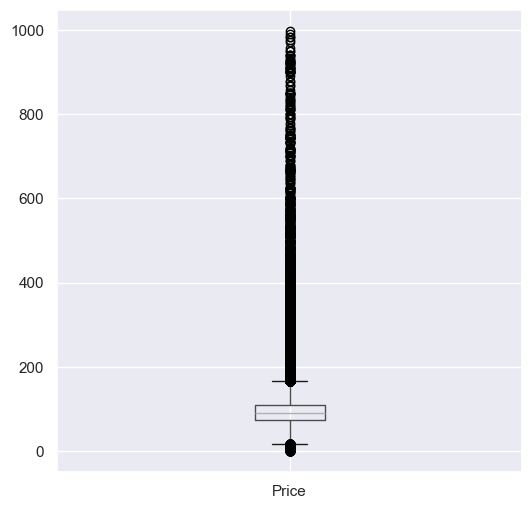

In [73]:
# plot out the price column to see outlier
df.boxplot('Price')

### Create categorical price by deriving New Features
We will adjust the range so that the frequency percentage of each price will be close to each other. This will be a method to make this class balance instead of just make the price range consecutive equally distributive.

In [75]:
# add the new column call Price_rance and input the value cooresponding to the price
df.loc[df['Price'].between(1, 61, inclusive="both"), 'Price_range'] = '1-60'
df.loc[df['Price'].between(61, 71, inclusive="both"), 'Price_range'] = '61-70'
df.loc[df['Price'].between(71, 81, inclusive="both"), 'Price_range'] = '71-80'
df.loc[df['Price'].between(81, 91, inclusive="both"), 'Price_range'] = '81-90'
df.loc[df['Price'].between(91, 101, inclusive="both"), 'Price_range'] = '91-100'
df.loc[df['Price'].between(101, 201, inclusive="both"), 'Price_range'] = '101-200'
df.loc[df['Price'].between(201, 301, inclusive="both"), 'Price_range'] = '201-300'
df.loc[df['Price'].between(301, 1001, inclusive="both"), 'Price_range'] = '301-1000'


In [76]:
def reorder_columns(df):
    columns = [column for column in df.columns if column != 'Price_range']
    columns = ['Price_range'] + columns
    df = df[columns]
    return df 

reorder_columns(df)

,Price_range,District,Ward,House_type,Legal_documents,No_floor,No_bedroom,Length,Width,Price,Day_Of_Week,Month,Street,Area
0,81-90,CẦU GIẤY,NGHĨA ĐÔ,BYROAD,AVAILABLE,4,5,11.0,4.0,86.96,WEDNESDAY,8,HOÀNG QUỐC VIỆT,44.0
1,101-200,THANH XUÂN,KIM GIANG,STREET_HOUSE,OTHERS,5,3,10.0,4.0,116.22,WEDNESDAY,8,KIM GIANG,40.0
2,61-70,HAI BÀ TRƯNG,MINH KHAI,BYROAD,AVAILABLE,4,4,10.0,4.0,65.0,WEDNESDAY,8,MINH KHAI,40.0
3,91-100,TÂY HỒ,THỤY KHUÊ,BYROAD,AVAILABLE,5,6,12.75,4.0,100.0,WEDNESDAY,8,VÕNG THỊ,51.0
4,81-90,THANH XUÂN,KIM GIANG,BYROAD,OTHERS,5,4,9.0,4.0,86.11,WEDNESDAY,8,KIM GIANG,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82473,71-80,HOÀNG MAI,YÊN SỞ,TOWNHOUSE,OTHERS,5,3,9.0,4.0,75.76,SUNDAY,2,TAM TRINH,36.0
82474,301-1000,BA ĐÌNH,PHÚC XÁ,BYROAD,AVAILABLE,3,3,8.0,4.0,375.0,SUNDAY,2,HỒNG HÀ,32.0
82475,71-80,HAI BÀ TRƯNG,MINH KHAI,TOWNHOUSE,AVAILABLE,5,3,8.0,4.0,76.56,SATURDAY,2,MINH KHAI,32.0
82476,81-90,NAM TỪ LIÊM,MỄ TRÌ,STREET_HOUSE,OTHERS,5,6,10.0,4.0,84.21,SATURDAY,2,MỄ TRÌ THƯỢNG,40.0


<a id="2.11"></a>
# Save the Intermediate data that has been transformed 

In [ ]:
import os

# set the path of the cleaned data to data and dash
interim_data_path = os.path.join(os.path.pardir,'data','interim')
write_interim_path = os.path.join(interim_data_path, 'cleaned_data.csv')

dash_data_path = os.path.join(os.path.pardir,'web_app','dash')
write_dash_path = os.path.join(dash_data_path, 'cleaned_data.csv')

streamlit_data_path = os.path.join(os.path.pardir,'web_app','streamlit','data')
write_streamlit_path = os.path.join(streamlit_data_path, 'cleaned_data.csv')

# Create a folder if it's not exist
os.makedirs(interim_data_path, exist_ok=True)
os.makedirs(dash_data_path, exist_ok=True)
os.makedirs(streamlit_data_path, exist_ok=True)

# Save files
df.to_csv(write_interim_path, index=False)
df.to_csv(write_dash_path, index=False)
df.to_csv(write_streamlit_path, index=False)

print("Cleaned data was successfully saved!")


Cleaned data was successfully saved!
